# VODKA CASE STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel("FINALdatablindtest.xls")
data.head()

,Resp No,PANEL,CENTRE,MAIN_BRND,AGE,AGES,Plcmnt_Ordr,Prod,Q2A,Q2B,...,Q5A_att5,Q5A_att6,Q5A_att7,Q5A_att8,Q5B_att1,Q5B_att2,Q5B_att3,Q5B_att4,Q5B_att5,"Q6_Int_p (Y=1,N=2)"
0,1,2,1,2,34,2,1,2,7,3,...,7,7,7,7,3,4,4,4,3,2
1,1,2,1,2,34,2,2,3,8,5,...,8,7,8,8,5,5,5,5,3,2
2,1,2,1,2,34,2,3,1,4,5,...,7,7,6,7,5,5,3,5,5,2
3,2,3,1,2,26,1,1,3,7,4,...,7,8,10,8,3,3,3,3,3,1
4,2,3,1,2,26,1,2,1,9,2,...,9,10,10,9,3,3,4,4,3,1


In [3]:
data.columns

Index(['Resp No', 'PANEL', 'CENTRE', 'MAIN_BRND', 'AGE', 'AGES', 'Plcmnt_Ordr',
       'Prod', 'Q2A', 'Q2B', 'Q3A', 'Q3B', 'Q5A_att1', 'Q5A_att2', 'Q5A_att3',
       'Q5A_att4', 'Q5A_att5', 'Q5A_att6', 'Q5A_att7', 'Q5A_att8', 'Q5B_att1',
       'Q5B_att2', 'Q5B_att3', 'Q5B_att4', 'Q5B_att5', 'Q6_Int_p (Y=1,N=2)'],
      dtype='object')

# Overall Likeability

Q5A_att1 gives the overall likability of the product hence we will verify the overall likability of the three products.

In [4]:
a = pd.crosstab(data['Q5A_att1'],data['Prod'])
a

Prod,1,2,3
Q5A_att1,,,
0,2,2,0
1,0,1,1
2,0,2,4
3,11,16,14
4,22,16,26
5,39,43,59
6,74,106,99
7,123,152,118
8,217,192,218


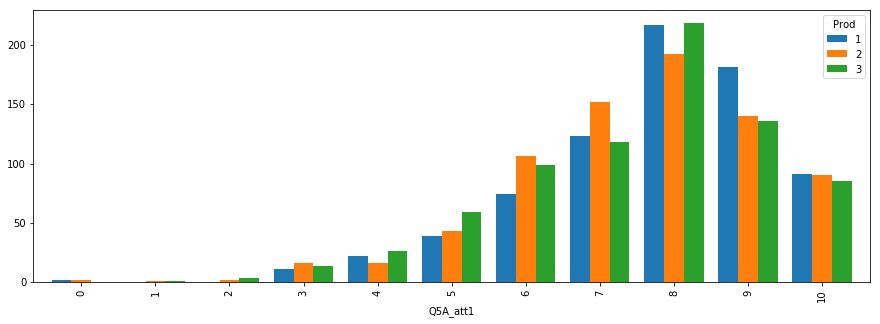

In [5]:
a.plot.bar(figsize=(15,5),width=0.8)

Since we are checking the overall likeability we will be checking the scores of Q5A_att1 ratings of 9 and 10.

The total % of people who have rated the products 9 and 10 are as below.
- Prod 1 = 35.80%
- Prod 2 = 30.02%
- Prod 3 = 29.01%

Since we have got the Percentage likability of the products we will perform a Z - Test to verify whether there is significant difference between the two products.

For the Z - Test we will be considering the below values, this will be a two tailed test because we need to check for significant difference which can be greater or less.
    - PROD1:
        - n = 760
        - CI = 95%
        - sample proportion - 0.358


From the z statistic the p-critical values, 0.324 < p < 0.392

    - PROD2:
        - n = 760
        - CI = 95%
        - sample proportion - 0.302


From the z statistic the p-critical values, 0.27 < p < 0.334

Since there is an overlap between the two ranges we can conclude that there is no significant difference between the Two products.

## Drivers of Overall Likeability

The Overall Likeability of the product is linked with 7 more attributes.

- 5A_Attr2 – Likeability of Aroma
- 5A_Attr3 – Likeability of Taste
- 5A_Attr4 – Likeability of Smoothness
- 5A_Attr5 – Likeability of Flavour
- 5A_Attr6 – Likeability of Throat-feel when the vodka goes down
- 5A_Attr7 – Likeability of After-taste
- 5A_Attr8 – Likeability of Mouth-feel when the vodka is sipped


Now we need to verify what all attributes drive the overall likeability of the product

To do this we can do a Simple Linear Regression keeping the overall likeability column as the Target and the Rest of the attributes as Predictors

In [6]:
likeability = data[['Q5A_att1', 'Q5A_att2', 'Q5A_att3','Q5A_att4', 'Q5A_att5', 'Q5A_att6', 'Q5A_att7', 'Q5A_att8']]
likeability.to_csv('likeability.csv',index=False)
likeability.head()

,Q5A_att1,Q5A_att2,Q5A_att3,Q5A_att4,Q5A_att5,Q5A_att6,Q5A_att7,Q5A_att8
0,7,6,7,7,7,7,7,7
1,8,8,8,8,8,7,8,8
2,7,6,7,8,7,7,6,7
3,10,8,8,8,7,8,10,8
4,9,9,9,9,9,10,10,9


First we will Build a simple linear regression model considering only one attribute i.e. Q5A_att2(Aroma).

In [7]:
import statsmodels.formula.api as sm
m = sm.ols(formula="Q5A_att1~Q5A_att2",data=likeability).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               Q5A_att1   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     2496.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        21:48:41   Log-Likelihood:                -3593.1
No. Observations:                2280   AIC:                             7190.
Df Residuals:                    2278   BIC:                             7202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6425      0.102     25.888      0.0

From the above summary we can observe that the explained variance by the model using only one predictor is just 52.3%.

- The F-Statistic(F = (SSR/(n-1))/SSE/(n-p-1)) is high and the p-value of the F-Statistic is also significant.
- The r2 and adj r2 values are 0.523 which means that this model with one attribute is able to explain only 52.3% of the variance
- The t statistic for the predictor is significantly high and its p-value is near to zero which means that this variable is significantly contributing in the explanation of variance.

Now we will do the same linear regression with all the predictor variables identified.
- 5A_Attr2 – Likeability of Aroma
- 5A_Attr3 – Likeability of Taste
- 5A_Attr4 – Likeability of Smoothness
- 5A_Attr5 – Likeability of Flavour
- 5A_Attr6 – Likeability of Throat-feel when the vodka goes down
- 5A_Attr7 – Likeability of After-taste
- 5A_Attr8 – Likeability of Mouth-feel when the vodka is sipped

In [8]:
import statsmodels.formula.api as sm
m = sm.ols(formula="Q5A_att1~Q5A_att2+Q5A_att3+Q5A_att4+Q5A_att5+Q5A_att6+Q5A_att7+Q5A_att8",data=likeability)
AR = m.fit()
print(AR.summary())

                            OLS Regression Results                            
Dep. Variable:               Q5A_att1   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1117.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        21:48:42   Log-Likelihood:                -2736.5
No. Observations:                2280   AIC:                             5489.
Df Residuals:                    2272   BIC:                             5535.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5755      0.082      7.042      0.0

In [9]:
print("Sum of Squared Residuals = ",AR.ssr)

Sum of Squared Residuals =  1472.1557173483202


We can observe that in our model r2 value has significantly increased and all the coefficients for all the attributes are significant.

- The F-Statistic(F = (SSR/(n-1))/SSE/(n-p-1)) is high and the p-value of the F-Statistic is also significant.
- The r2 and adj r2 values are 0.775 which means that this model with all the attributes is able to explain only 77.5% of the variance
- The t static for all the predictors is significantly high and their p-value is near to zero which means that the variables together significantly contribute in the explaination of variance.
- The p-value of Q5A_att7(After-taste) is > 0.05 so we can repeat the regression removing the variable and check our results.
- Sum of Squared Residuals =  513.20

In [10]:
import statsmodels.formula.api as sm
m = sm.ols(formula="Q5A_att1~Q5A_att2+Q5A_att3+Q5A_att4+Q5A_att5+Q5A_att6+Q5A_att8",data=likeability)
AR = m.fit()
print(AR.summary())

                            OLS Regression Results                            
Dep. Variable:               Q5A_att1   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1302.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        21:48:42   Log-Likelihood:                -2738.0
No. Observations:                2280   AIC:                             5490.
Df Residuals:                    2273   BIC:                             5530.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5892      0.081      7.241      0.0

In [11]:
print("Sum of Squared Residuals = ",AR.ssr)

Sum of Squared Residuals =  1474.0939302686584


We can observe the following differences in the output after removing Q5A_att7(After-Taste):

- The F Statistic value has increased from 1117 to 1302.
- There is no change in the R2 value.
- The sum of squared residuals has increased from 1472.155 to 1474.09 which is not a significant increase.

###### From the Above observations we can say that After-taste doesn't significantly contribute towards the overall Likeability of the product

## Multi-Collinearity among variables

In [12]:
import seaborn as sns
likeability.corr()

,Q5A_att1,Q5A_att2,Q5A_att3,Q5A_att4,Q5A_att5,Q5A_att6,Q5A_att7,Q5A_att8
Q5A_att1,1.000000,0.723069,0.823922,0.766472,0.765972,0.765213,0.770606,0.799983
Q5A_att2,0.723069,1.000000,0.699165,0.650235,0.699211,0.644325,0.658032,0.652336
Q5A_att3,0.823922,0.699165,1.000000,0.777731,0.783251,0.749416,0.790696,0.796745
Q5A_att4,0.766472,0.650235,0.777731,1.000000,0.730227,0.783715,0.758622,0.761744
Q5A_att5,0.765972,0.699211,0.783251,0.730227,1.000000,0.742777,0.772320,0.768208
Q5A_att6,0.765213,0.644325,0.749416,0.783715,0.742777,1.000000,0.795996,0.814465
Q5A_att7,0.770606,0.658032,0.790696,0.758622,0.772320,0.795996,1.000000,0.830628
Q5A_att8,0.799983,0.652336,0.796745,0.761744,0.768208,0.814465,0.830628,1.000000


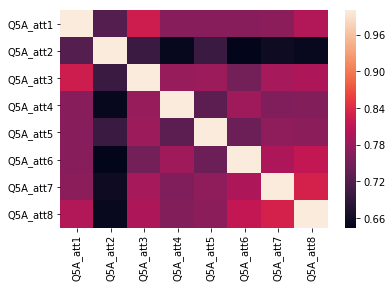

In [13]:
sns.heatmap(likeability.corr())

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
scl = StandardScaler()

In [15]:
likeability_std = scl.fit_transform(likeability)
likeability_std = pd.DataFrame(likeability_std,columns=likeability.columns)
likeability_std.to_csv('likeability_std.csv',index=False)
likeability_std.head()

,Q5A_att1,Q5A_att2,Q5A_att3,Q5A_att4,Q5A_att5,Q5A_att6,Q5A_att7,Q5A_att8
0,-0.350115,-0.781965,-0.301486,-0.257176,-0.229424,-0.232727,-0.303240,-0.288764
1,0.240316,0.304826,0.264732,0.292882,0.324107,-0.232727,0.266271,0.285240
2,-0.350115,-0.781965,-0.301486,0.292882,-0.229424,-0.232727,-0.872751,-0.288764
3,1.421177,0.304826,0.264732,0.292882,-0.229424,0.314301,1.405294,0.285240
4,0.830746,0.848221,0.830950,0.842940,0.877639,1.408356,1.405294,0.859244


From the above plots we can see that there is significant correlation among the variables.

To handle this we can use Principal Component Analysis and remove few of the attributes that do not explain much of the variance and hence reduce the dimensions.

## Principal Component Analysis

For the Principal Component Analysis we will also consider the attribute After-Taste as it may explain some part of the variance 

In [16]:
from sklearn.decomposition import PCA
mypca = PCA(n_components=6)
PCs = mypca.fit_transform(likeability_std[['Q5A_att2','Q5A_att3','Q5A_att4','Q5A_att5','Q5A_att6','Q5A_att7','Q5A_att8']])
PCs = pd.DataFrame(PCs,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.887055,0.465339,0.095885,-0.156038,-0.106431,0.038368
1,-0.565220,-0.204215,0.137311,-0.238494,0.146587,-0.205819
2,0.900379,0.436403,-0.433586,-0.542759,-0.321796,0.282032
3,-1.005782,0.280622,-0.007703,0.483494,0.616515,-0.784998
4,-2.679122,0.203479,-0.016058,0.415319,-0.091785,-0.187008


In [17]:
mypca.explained_variance_

array([5.48454962, 0.43112695, 0.27585087, 0.2523241 , 0.22033185,
       0.17910657])

In [18]:
mypca.explained_variance_ratio_

array([0.78316344, 0.06156255, 0.03938998, 0.03603049, 0.03146217,
       0.02557543])

After performing the Principal Component analysis we can see that the the first PC is explaining 78% of the variance.

So if we retain the first three principal components we can expalin 90% of the variance.

In [19]:
mypca = PCA(n_components=3)
data_pc = mypca.fit_transform(likeability_std[['Q5A_att2', 'Q5A_att3','Q5A_att4', 'Q5A_att5', 'Q5A_att6', 'Q5A_att8']])
data_pc = pd.DataFrame(data_pc,columns=['PC1','PC2','PC3'])
data_pc.loc[:,'Q5A_att1'] = likeability['Q5A_att1']
data_pc.head()

,PC1,PC2,PC3,Q5A_att1
0,0.836983,0.463675,0.167813,7
1,-0.502205,-0.220612,0.157980,8
2,0.611425,0.603628,-0.113191,7
3,-0.500328,0.029217,-0.382574,10
4,-2.314988,0.124968,-0.180056,9


In [20]:
mypca.components_

array([[-0.37572381, -0.4191673 , -0.41006154, -0.41153483, -0.41299715,
        -0.41839259],
       [-0.85150015,  0.00158225,  0.25443338, -0.10979345,  0.34560456,
         0.28055574],
       [-0.31207057,  0.26097568, -0.51086167,  0.67679523, -0.30332503,
         0.15318665]])

## Factor Analysis

Now we need to look which all attributes are contributing to the principal components.

The Rotated Component matrix gives us this information.
We need to check which attributes are contributing most in which Principle Component.

To do this we have used R and performed PCA to get the Rotated Component Matrix of Principal components.

In [21]:
import rpy2
import warnings
warnings.filterwarnings('ignore')
%load_ext rpy2.ipython

In [22]:
%R -i likeability_std

In [23]:
%R require(psych)
%R pca1 = principal(likeability_std[2:8],nfactors = 3,scores = TRUE) 

R object with classes: ('psych', 'principal') mapped to:
<ListVector - Python:0x000002338976E248 / R:0x00000233887A7050>
[FloatVector, StrVector, IntVector, FloatVector, ..., Matrix, Matrix, Matrix, Matrix]
  values: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000023389757388 / R:0x0000023387F0C578>
[5.482144, 0.430938, 0.275730, 0.252213, 0.220235, 0.179028, 0.159711]
  rotation: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000233897A82C8 / R:0x000002338A3A3E38>
['varimax']
  n.obs: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000023389798DC8 / R:0x000002338A5E0328>
[2,280]
  communality: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000023386133EC8 / R:0x0000023389AEEEE0>
[0.976375, 0.824036, 0.922291, 0.875533, 0.858814, 0.863137, 0.868625]
...
  fit: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x00000233897989C8 / R:0x0000023388B4AD18>
[0.665929, -0.234049, -0.708350, 0.458581, ..., 0.141227, 0.588423, -0.418883, 0.691589]
  fit.off: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x00000233897A8188 / R:0x0000023388B43290>
[2.593077, 0.370440, 0.370440, 0.418994, ..., 0.212871, 0.884116, 0.240772, 1.000000]
  fn: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('loadings',) mapped to:
<Matrix - Python:0x0000023389798C48 / R:0x0000023388CE5FF8>
[0.328115, 0.644848, 0.358657, 0.769445, ..., 0.446708, 0.261051, 0.271301, 0.253222]
  Call: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x00000233899DC5C8 / R:0x000002338A627940>
[0.042954, 0.273118, -0.685239, 0.375637, ..., -1.150503, 0.275628, 0.291286, -1.150503]

Eigen Values of the principal Components.

In [24]:
%R pca1$values

array([5.48214411, 0.43093786, 0.27572989, 0.25221344, 0.22023521,
       0.17902801, 0.15971149])

Eigen Values of the principal Components.

Below is the Rotated Component Matrix.

In [25]:
FA = %R pca1$Structure
FA = pd.DataFrame(FA,columns=['F1','F2','F3'],index=likeability_std.drop('Q5A_att1',axis=1).columns)
FA

,F1,F2,F3
Q5A_att2,0.328115,0.305421,0.880587
Q5A_att3,0.644848,0.475510,0.426730
Q5A_att4,0.358657,0.816404,0.356568
Q5A_att5,0.769445,0.289724,0.446708
Q5A_att6,0.538378,0.707683,0.261051
Q5A_att7,0.736495,0.497100,0.271301
Q5A_att8,0.718772,0.536536,0.253222


From the Rotated Component Matrix we can observe the following:
    
- 5A_Attr2(Aroma) - F3
- 5A_Attr3 (Taste) - F1
- 5A_Attr4 (Smoothness) - F2
- 5A_Attr5 (Flavour) - F1
- 5A_Attr6 (Throat-feel when the vodka goes down) - F2
- 5A_Attr7 (After-taste) - F1
- 5A_Attr8 (Mouth-feel when the vodka is sipped) - F2

Factors: 
- F1 = Taste, Flavour, After-taste
- F2 = Smoothness, Throat-feel when the vodka goes down, Mouth-feel when the vodka is sipped
- F3 = Aroma

From the above details we can name the Factors:
    - Taste = Factor 1 has attributes that are related to taste.
    - Feel = Factor 2 has attributes related to Strength and Feel of the Vodka.
    - Smell = Factor 3 has only one attribute that is related to the smell of the vodka.

In [26]:
PCs = %R pca1$scores

In [27]:
PCs = pd.DataFrame(PCs,columns=['PC1','PC2','PC3'])
PCs.loc[:,'Q5A_att1'] = likeability['Q5A_att1']
PCs.head()

,PC1,PC2,PC3,Q5A_att1
0,0.042954,-0.052273,-0.821272,7
1,0.273118,-0.169071,0.346631,8
2,-0.685239,0.623113,-0.642846,7
3,0.375637,0.441877,-0.175951,10
4,0.812690,0.824105,0.257039,9


Adding the Target column to the Factors.

In [28]:
import statsmodels.formula.api as sm
m = sm.ols(formula="Q5A_att1~PC1+PC2+PC3",data=PCs)
AR = m.fit()
print(AR.summary())

                            OLS Regression Results                            
Dep. Variable:               Q5A_att1   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     2493.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        21:48:45   Log-Likelihood:                -2777.3
No. Observations:                2280   AIC:                             5563.
Df Residuals:                    2276   BIC:                             5586.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5930      0.017    442.810      0.0

In [29]:
print("Sum of Squared Residuals = ",AR.ssr)

Sum of Squared Residuals =  1525.7986991764565


We can observe the following differences in the output after removing Q5A_att7(After-Taste):

- The F Statistic value has increased from 1302 to 2493.
- The R2 value has decreased Slightly.
- All the Factors are significantly contributing in the explanation of Variance.

Thus from the above analysis we have derived the following Factors
- Taste = Factor 1 has attributes that are related to taste.
- Feel = Factor 2 has attributes related to Strength and Feel of the Vodka.
- Smell = Factor 3 has only one attribute that is related to the smell of the vodka.